In [ ]:
print("Name:         Mohit kumar\nRoll Number:  201210030")

Name:         Mohit kumar
Roll Number:  201210030


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#importing data 
ratings = pd.read_csv('./ratings.csv')
movies = pd.read_csv('./movies.csv')

In [ ]:
ratings.head()

userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

In [ ]:
len(ratings['rating'].unique())

10

In [ ]:
data = ratings.pivot(index = 'movieId', columns = 'userId', values = 'rating')
data.fillna(0, inplace=True)

In [ ]:
data.head()

userId   1    2    3    4    5    6    7    8    9    10   ...  601  602  603  \
movieId                                                    ...                  
1        4.0  0.0  0.0  0.0  4.0  0.0  4.5  0.0  0.0  0.0  ...  4.0  0.0  4.0   
2        0.0  0.0  0.0  0.0  0.0  4.0  0.0  4.0  0.0  0.0  ...  0.0  4.0  0.0   
3        4.0  0.0  0.0  0.0  0.0  5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4        0.0  0.0  0.0  0.0  0.0  3.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
5        0.0  0.0  0.0  0.0  0.0  5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

userId   604  605  606  607  608  609  610  
movieId                                     
1        3.0  4.0  2.5  4.0  2.5  3.0  5.0  
2        5.0  3.5  0.0  0.0  2.0  0.0  0.0  
3        0.0  0.0  0.0  0.0  2.0  0.0  0.0  
4        0.0  0.0  0.0  0.0  0.0  0.0  0.0  
5        3.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 610 columns]

In [ ]:
#number of users who voted
no_user_voted = ratings.groupby('movieId')['rating'].agg('count')
#groupby - (unique values)[for the given column].agg('count'-count number of ratings)
#number of movies that were voted
no_movies_voted = ratings.groupby('userId')['rating'].agg('count')

In [ ]:
no_user_voted.head()

movieId
1    215
2    110
3     52
4      7
5     49
Name: rating, dtype: int64

In [ ]:
no_movies_voted.head()

userId
1    232
2     29
3     39
4    216
5     44
Name: rating, dtype: int64

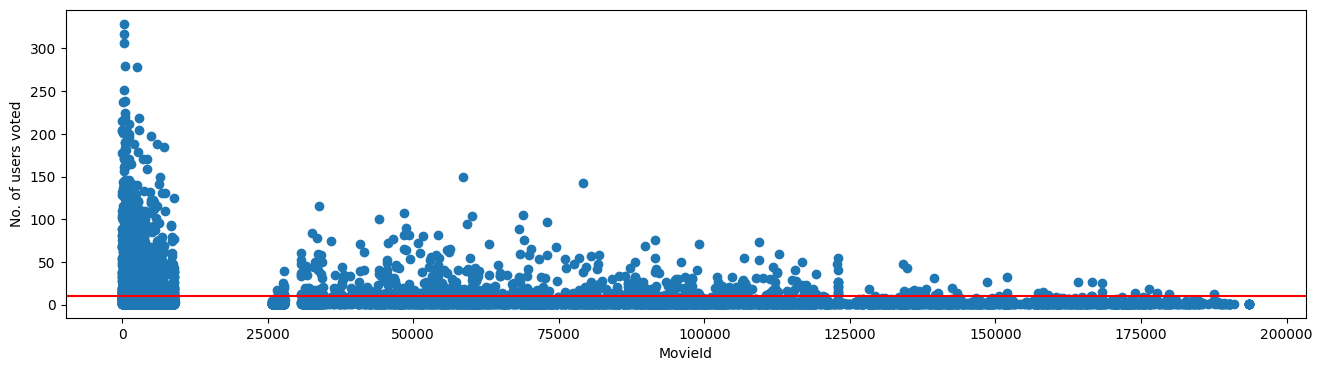

In [ ]:
#graph explaining movie qualification
f,ax = plt.subplots(figsize=(16,4))
ax.scatter(no_user_voted.index,no_user_voted)
ax.axhline(10,color = 'red')
plt.xlabel('MovieId')
plt.ylabel('No. of users voted')
plt.show()

In [ ]:
ratings['rating'].plot(kind='hist')

<Axes: ylabel='Frequency'>

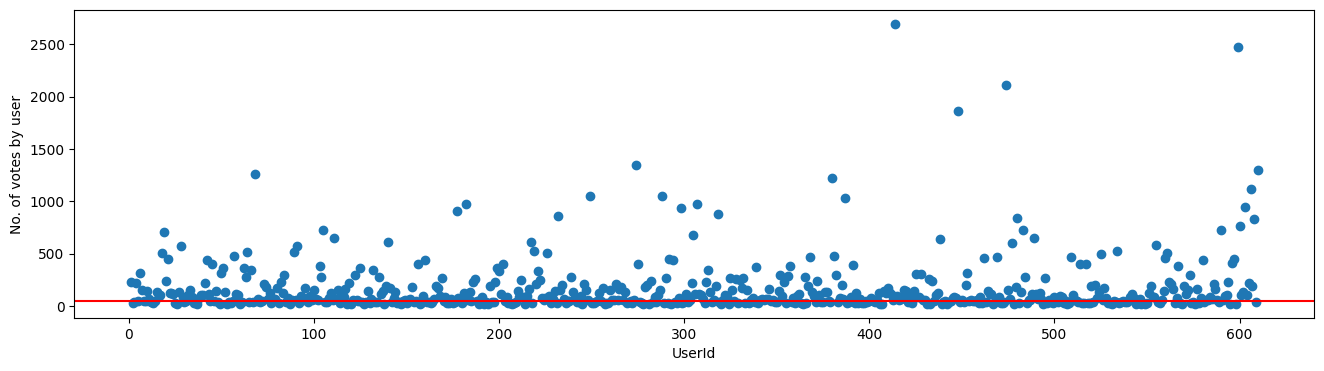

In [ ]:
#graph explaining user qualification
f,ax = plt.subplots(figsize=(16,4))
plt.scatter(no_movies_voted.index,no_movies_voted)
plt.axhline(50,color = 'red')
plt.xlabel('UserId')
plt.ylabel('No. of votes by user')
plt.show()

In [ ]:
#threshold-> number of users who voted a movie should  be more than 10
data = data.loc[no_user_voted[no_user_voted > 10].index,:]
#threshold-> number of votes by a particular user should be more than 50
data = data.loc[:,no_movies_voted[no_movies_voted > 50].index]

In [ ]:
data.head(1)

userId   1    4    6    7    10   11   15   16   17   18   ...  600  601  602  \
movieId                                                    ...                  
1        4.0  0.0  0.0  4.5  0.0  0.0  2.5  0.0  4.5  3.5  ...  2.5  4.0  0.0   

userId   603  604  605  606  607  608  610  
movieId                                     
1        4.0  3.0  4.0  2.5  4.0  2.5  5.0  

[1 rows x 378 columns]

In [ ]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

In [ ]:
#removing sparsity
csr_data = csr_matrix(data.values)
data.reset_index(inplace = True)

In [ ]:
data.head(4)

userId  movieId    1    4    6    7   10   11   15   16   17  ...  600  601  \
0             1  4.0  0.0  0.0  4.5  0.0  0.0  2.5  0.0  4.5  ...  2.5  4.0   
1             2  0.0  0.0  4.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  4.0  0.0   
2             3  4.0  0.0  5.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
3             5  0.0  0.0  5.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  2.5  0.0   

userId  602  603  604  605  606  607  608  610  
0       0.0  4.0  3.0  4.0  2.5  4.0  2.5  5.0  
1       4.0  0.0  5.0  3.5  0.0  0.0  2.0  0.0  
2       0.0  0.0  0.0  0.0  0.0  0.0  2.0  0.0  
3       0.0  0.0  3.0  0.0  0.0  0.0  0.0  0.0  

[4 rows x 379 columns]

In [ ]:
knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute', n_neighbors = 20, n_jobs = -1)
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [ ]:
def get_movie_recommendation(movie_name):
    n_movies_to_reccomend = 10
    movie_list = movies[movies['title'].str.contains(movie_name)]   
    if len(movie_list):
        movie_idx= movie_list.iloc[0]['movieId']
        movie_idx = data[data['movieId'] == movie_idx].index[0]
        distances , indices = knn.kneighbors(csr_data[movie_idx],n_neighbors=n_movies_to_reccomend+1)
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]  
        recommend_frame = []
        for val in rec_movie_indices:
            movie_idx = data.iloc[val[0]]['movieId']
            idx = movies[movies['movieId'] == movie_idx].index
            recommend_frame.append({'Title':movies.iloc[idx]['title'].values[0]})
        df = pd.DataFrame(recommend_frame,index=range(1,n_movies_to_reccomend+1))
        return df
    else:
        return "No movies found. Please check your input"

In [ ]:
get_movie_recommendation('Iron Man')

Title
1                        Up (2009)
2   Guardians of the Galaxy (2014)
3                  Watchmen (2009)
4                 Star Trek (2009)
5             Batman Begins (2005)
6                    Avatar (2009)
7                Iron Man 2 (2010)
8                    WALL·E (2008)
9          Dark Knight, The (2008)
10            Avengers, The (2012)

In [ ]:
get_movie_recommendation('Memento')

Title
1                              American Beauty (1999)
2                           American History X (1998)
3                                 Pulp Fiction (1994)
4   Lord of the Rings: The Return of the King, The...
5                            Kill Bill: Vol. 1 (2003)
6       Lord of the Rings: The Two Towers, The (2002)
7        Eternal Sunshine of the Spotless Mind (2004)
8                                  Matrix, The (1999)
9   Lord of the Rings: The Fellowship of the Ring,...
10                                  Fight Club (1999)